In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.gridspec as gridspec
import seaborn as sns
from scipy.spatial import ConvexHull

In [62]:
#read datafiles
df_Linear = pd.read_csv('./MT_Data/Undirect_Mapping.csv')
                        
#get valid data from the dataset
zeta = np.array(df_Linear.zeta)
omega_ratio = np.array(df_Linear.omega_ratio)
sol_1 = np.array(df_Linear.solution_1)
sol_2 = np.array(df_Linear.solution_2)
sol_3 = np.array(df_Linear.solution_3)
power = np.array(df_Linear.power)
#zeta

#reshape 1D vec -> 2D matrix

#dimension of sz
sz = int(np.sqrt(len(zeta)))

z = zeta.reshape(sz,sz)
OR = omega_ratio.reshape(sz,sz)
a1 = sol_1.reshape(sz,sz)
a2 = sol_2.reshape(sz,sz)
a3 = sol_3.reshape(sz,sz)

P = power.reshape(sz,sz)
#P

#add the powerpart
Prj_z = []
Prj_omega = []
Prj_a = []

for i in range(0,sz):
    for j in range(0,sz):
        if abs(P[i,j]) <= 0.025:
            if OR[i,j]>0.4:
                Prj_z = np.append(Prj_z,z[i,j])
                Prj_omega = np.append(Prj_omega,OR[i,j])
                Prj_a_element = [a1[i,j],a2[i,j],a3[i,j]]
                Prj_a = np.append(Prj_a,Prj_a_element)
#add the edges
sol_mat = Prj_a.reshape(int(len(Prj_a)/3),3)
#sol_mat

#add the edges

#find the approximated points coordinates at the lower bound (use dataframe)

df_zOR = pd.DataFrame({'new_z':Prj_z,'new_omega':Prj_omega ,'sol1':sol_mat[:,0],'sol2':sol_mat[:,1],'sol3':sol_mat[:,2]})
edge_df = df_zOR.groupby('new_z').min('new_omega')

z_coord = np.array(edge_df.index)
omega_coord = np.array(edge_df.new_omega)
sol1_dat = np.array(edge_df.sol1)
sol2_dat = np.array(edge_df.sol2)
sol3_dat = np.array(edge_df.sol3)

edge_df.to_csv('edgedata_Lin.csv', index='False')

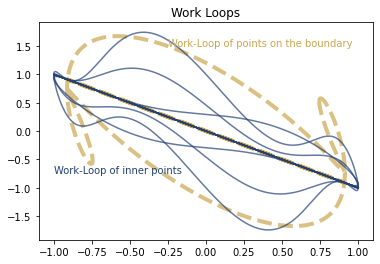

In [57]:
#work-loop plot
#initial dataset storage

sz_new = int(len(z_coord))

x = np.zeros(sz_new * 1000)
x = x.reshape(sz_new,1000)

dx = np.zeros(sz_new * 1000)
dx = dx.reshape(sz_new,1000)

ddx = np.zeros(sz_new * 1000)
ddx = ddx.reshape(sz_new,1000)

G = np.zeros(sz_new * 1000)
G = G.reshape(sz_new,1000)

F = np.zeros(sz_new * 1000)
F = F.reshape(sz_new,1000)
#-----------------
sz_new2 = int(len(Prj_z))

x2 = np.zeros(sz_new2 * 1000)
x2 = x2.reshape(sz_new2,1000)

dx2 = np.zeros(sz_new2 * 1000)
dx2 = dx2.reshape(sz_new2,1000)

ddx2 = np.zeros(sz_new2 * 1000)
ddx2 = ddx2.reshape(sz_new2,1000)

G2 = np.zeros(sz_new2 * 1000)
G2 = G2.reshape(sz_new2,1000)

F2 = np.zeros(sz_new2 * 1000)
F2 = F2.reshape(sz_new2,1000)

#computation
#edge work-loop
for i in range(0,sz_new):
     T = 2 * np.pi/omega_coord[i]
     t = np.linspace(0,T,1000)
     for j in range(0,1000):
        x[i,j] = sol1_dat[i] * np.cos(omega_coord[i] *t[j]) + sol2_dat[i] * np.cos(3 * omega_coord[i] *t[j]) + sol3_dat[i] * np.cos(5 * omega_coord[i] *t[j]) 
        dx[i,j] = - omega_coord[i] * (sol1_dat[i] * np.sin(omega_coord[i] *t[j])+ 3 * sol2_dat[i] * np.sin( 3 * omega_coord[i] *t[j]) + 5 * sol3_dat[i] * np.sin(5 * omega_coord[i] *t[j]))
        ddx[i,j] = - omega_coord[i] * omega_coord[i] * (sol1_dat[i] * np.cos(omega_coord[i] *t[j]) + 9 *sol2_dat[i] * np.cos(3 * omega_coord[i] *t[j]) + 25 * sol3_dat[i] * np.cos(5 * omega_coord[i] *t[j]))
        G[i,j] = ddx[i,j] + 2 * z_coord[i] * dx[i,j]
        F[i,j] = - x[i,j] 
#inner point work loop
for i in range(0,sz_new2):
     T = 2 * np.pi/Prj_omega[i]
     t = np.linspace(0,T,1000)
     for j in range(0,1000):
        x2[i,j] = sol_mat[i,0] * np.cos(Prj_omega[i] *t[j]) + sol_mat[i,1] * np.cos(3 * Prj_omega[i] *t[j]) + sol_mat[i,2] * np.cos(5 * Prj_omega[i] *t[j]) 
        dx2[i,j] = - Prj_omega[i] * (sol_mat[i,0] * np.sin(Prj_omega[i] *t[j])+ 3 * sol_mat[i,1] * np.sin( 3 * Prj_omega[i] *t[j]) + 5 * sol_mat[i,2] * np.sin(5 * Prj_omega[i] *t[j]))
        ddx2[i,j] = - Prj_omega[i] * Prj_omega[i] * (sol_mat[i,0] * np.cos(Prj_omega[i] *t[j]) + 9 *sol_mat[i,1] * np.cos(3 * Prj_omega[i] *t[j]) + 25 * sol_mat[i,2] * np.cos(5 * Prj_omega[i] *t[j]))
        G2[i,j] = ddx2[i,j] + 2 * Prj_z[i] * dx2[i,j]
        F2[i,j] = - x2[i,j] 


#plot section
plt.rcParams['axes.facecolor'] = 'white'
#edge
plt.plot(x[23],G[23],linestyle = '--',linewidth = 4,c ="#cba74e",alpha=0.7)
plt.plot(x[23],F[23],linestyle = '--',linewidth = 4, c ="#cba74e",alpha=1)

#inner point
plt.plot(x2[23],G2[23],c ="#234175",alpha=0.7)
plt.plot(x2[23],F2[23],c ="#234175",alpha=1)

plt.plot(x2[31],G2[31],c ="#234175",alpha=0.7)
plt.plot(x2[31],F2[31],c ="#234175",alpha=1)

plt.plot(x2[79],G2[79],c ="#234175",alpha=0.7)
plt.plot(x2[79],F2[79],c ="#234175",alpha=1)

#add text
plt.text(-0.25, 1.5, "Work-Loop of points on the boundary",c ="#cba74e",  fontsize=10)
plt.text(-1, -0.75, "Work-Loop of inner points",c ="#234175", fontsize=10)

plt.title('Work Loops')

plt.grid(False)

plt.savefig('undirect_opt_workloop.svg',format='svg',dpi=600)
plt.show()